## Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.



In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_theme(context = "notebook", style = "darkgrid")

### 1. Cookie Problem


Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?


In [5]:
## P(A|B) = P((B|A)*P(A)) / P(B)

## P (I, x=1) ---> probability that vanilla cookie belongs to Bowl I

In [17]:
p_vani_I = 0.75
p_vani_II = 0.50


dist_I = stats.binom(1, p_vani_I) 
dist_II = stats.binom(1, p_vani_II)

In [18]:
dist_I.pmf(1)

0.75

In [21]:
p_A = 0.5 # probability of messing with Bowl 1
p_B =  0.5 * dist_I.pmf(1) + 0.5 * dist_II.pmf(1) ## prob of picking one vanilla cookie from either bowl
p_BA = dist_I.pmf(1) ## prob of getting one vanilla cookie from Bowl I

p_AB = (p_BA * p_A)/p_B
p_AB

0.6

What is the probability that it came from Bowl 2?

In [24]:
p_A = 0.5 # probability of messing with Bowl 2
p_B =  0.5 * dist_I.pmf(1) + 0.5 * dist_II.pmf(1) ## prob of picking one vanilla cookie from either bowl
p_BA = dist_II.pmf(1) ## prob of getting one vanilla cookie from Bowl II

p_AB = (p_BA * p_A)/p_B
p_AB

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?



In [26]:
p_choc_I = 0.25
p_choc_II = 0.50


dist_I_choc = stats.binom(1, p_choc_I) 
dist_II_choc = stats.binom(1, p_choc_II)

In [28]:
dist_I_choc.pmf(1)

0.25

In [29]:
## FOR BOWL 1

p_A = 0.5 # probability of messing with Bowl 1
p_B =  0.5 * dist_I_choc.pmf(1) + 0.5 * dist_II_choc.pmf(1) ## prob of picking one choc cookie from either bowl
p_BA = dist_I_choc.pmf(1) ## prob of getting one choc cookie from Bowl I

p_AB = (p_BA * p_A)/p_B
p_AB

0.3333333333333333

In [31]:
## FOR BOWL 2

p_A = 0.5 # probability of messing with Bowl 2
p_B =  0.5 * dist_I_choc.pmf(1) + 0.5 * dist_II_choc.pmf(1) ## prob of picking one choc cookie from either bowl
p_BA = dist_II_choc.pmf(1) ## prob of getting one choc cookie from Bowl II

p_AB = (p_BA * p_A)/p_B
p_AB

0.6666666666666666

### 2. Candy Problem


Suppose you have two bags of candies:

In Bag 1, the mix of colors is:

Brown - 30% <br/>
Yellow - 20% <br/>
Red - 20% <br/>
Green - 10% <br/>
Orange - 10% <br/>
Tan - 10% <br/>

In Bag 2, the mix of colors is:

Blue - 24% <br/>
Green - 20% <br/>
Orange - 16% <br/>
Yellow - 14% <br/>
Red - 13% <br/>
Brown - 13% <br/>
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.



In [1]:
## P(A|B) = P((B|A)*P(A)) / P(B)

## P (A = I, A=yellow B=green) --> probability that yellow candy came from Bag 1 given that we have a green
# candy and a yellow candy

In [2]:
## P(A) --> candy A coming from Bag 1 (hypothesis)

## P(B) --> we have a green candy and a yellow candy independent from Bag (normalizing constant)

## P(B|A) -->  probability that we have a green candy given that candy A came from Bag 1 
# (likelihood: chance of observing our data given our hypothesis)

In [106]:
p_yellow_I = 0.2
p_yellow_II = 0.14

p_green_I = 0.1
p_green_II = 0.2

In [4]:
## Yellow coming from Bag 1

p_A = 0.5 
p_B =  (0.2 * 0.2 * 0.5) + (0.14 * 0.1 * 0.5) 

p_BA = 0.2 * 0.2 # probability that we have a green candy given that candy A came from Bag 1 
p_AB = (p_BA * p_A)/p_B
p_AB

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?



In [5]:
## Yellow coming from Bag 2

p_A = 0.5
p_B =  (0.2 * 0.2 * 0.5) + (0.14 * 0.1 * 0.5) 
p_BA = 0.14 * 0.1  # probability that we have a green candy given that candy A came from Bag 2 

p_AB = (p_BA * p_A)/p_B
p_AB

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?



In [7]:
## Green coming from Bag 1 

p_A = 0.5
p_B =  (0.2 * 0.2 * 0.5) + (0.14 * 0.1 * 0.5) 
p_BA = 0.14 * 0.1 # probability that we have a yellow candy given that candy B came from Bag 1 

p_AB = (p_BA * p_A)/p_B
p_AB

0.25925925925925924

In [6]:
## Green coming from Bag 2

p_A = 0.5
p_B =  (0.2 * 0.2 * 0.5) + (0.14 * 0.1 * 0.5) 
p_BA = 0.2 * 0.2 # probability that we have a green candy given that candy B came from Bag 2

p_AB = (p_BA * p_A)/p_B
p_AB

0.7407407407407408

### 3. Monty Hall Problem


Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?



In [153]:
## When Monty opens a door, we are getting new information about the problem. 
## Bayes' theorem uses that information and updates our probabilities.

In [154]:
## P(A|B) = P((B|A)*P(A)) / P(B)

## P (car in Door A, Door B opened) ---> probability of finding the car in Door A given that Monty opened Door B

In [ ]:
## P(A) --> prob of finding the car in Door A (1/3)

## P(B) --> prob of Monty opening Door B (1/2) --> because Monty can not choose the door we picked.

## P(B|A) --> prob of Monty opening Door B given that the car is behind Door A (1/2)
# If the car is truly behind Door A, then Monty can pick one out of the two remaining doors to open. 
# This value is also 1/2.

In [155]:
p_A = 0.33 
p_B = 0.50
p_BA = 0.50

p_AB = (p_BA * p_A)/p_B
p_AB

0.33

In [157]:
1 - p_AB ## prob of finding the car when we switch to Door C

0.6699999999999999

In [158]:
## P (Door C, Door B) ---> probability of finding the car when we switch to Door C given that Monty opened Door B

## P(A) --> prob of finding the car in Door C (1/3)

## P(B) --> prob of Monty opening Door B (1/2) --> because Monty can not choose the door we picked.

## P(B|A) --> prob of Monty opening Door B given that the car is behind Door C (1)
# If the car is truly behind Door C,  and we picked Door A as our first guess, 
## Monty has to open Door C. The probability is 1.

In [160]:
p_A = 0.33 
p_B = 0.50
p_BA = 1

p_AB = (p_BA * p_A)/p_B
p_AB

0.66

### 4. Bayesian Analysis


Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.



In [108]:
# 1. Specifiy our prior: prob distribution that encodes the knowledge about the parameters of our model

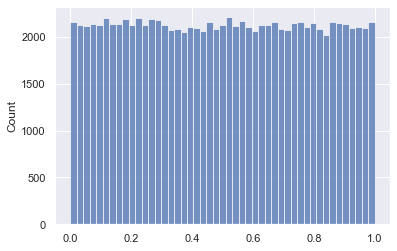

In [111]:
# Defining our prior
n_draws = 100000
prior = np.random.uniform(0, 1, size=n_draws)
sns.histplot(prior); 

In [115]:
# Defining our generative model
def generative_model(n, p): ## sampling function: creates random samples from prior distribution and generates observable data
    result = np.random.binomial(n, p)
    return result

In [114]:
observed = (100, 14)
sim_data = list()

for p in prior:
    sim_data.append(generative_model(observed[0], p))

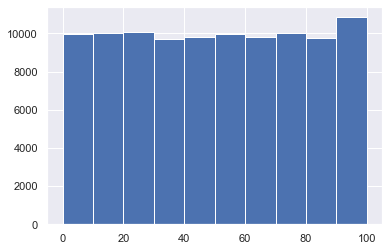

In [127]:
plt.hist(sim_data);

Now we can filter all simulations generated and keep only those that match our observed data points

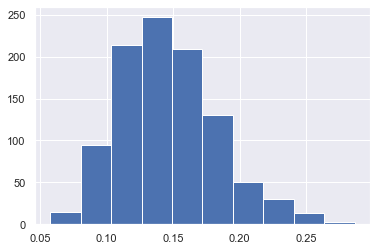

In [116]:
posterior = prior[list(map(lambda x: x == observed[1], sim_data))]
plt.hist(posterior);

Produce a set of descriptive statistics for the posterior distribution.



In [132]:
q5, med, q95 = np.round(np.quantile(posterior, [0.05, 0.5, 0.95]), 2)
vals, counts = np.unique(np.round(posterior, 2), return_counts=True)
mode_value = vals[np.argwhere(counts == np.max(counts)).flatten()]

What is the 90% credible interval range?



In [134]:
print(f"Q5: {q5} - Med.: {med} - Q95: {q95}") # We shrunk the confidence interval, which is good

Q5: 0.09 - Med.: 0.14 - Q95: 0.21


What is the Maximum Likelihood Estimate?



In [138]:
print(f"MLE: {mode_value}")

MLE: [0.13]
